## Summer 2022 Data Science Intern Challenge   
## Question 1: 

**by Anqi Li**  
2022/01/07

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### (1) Importing data

In [1]:
library(readr)
df <- read.csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv") 
head(df,3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,53,746,224,2,cash,2017-03-13 12:36:56
2,2,92,925,90,1,cash,2017-03-03 17:38:52
3,3,44,861,144,1,cash,2017-03-14 4:23:56


#### (2) Calculate the AOV and evaluate this data

In [2]:
paste("The number of orders: ", nrow(df))
paste("The total revenue: $", sum(df$order_amount))
paste("The average order value: $", round(sum(df$order_amount)/nrow(df),2))

[1] "The number of orders:  5000"

[1] "The total revenue: $ 15725640"

[1] "The average order value: $ 3145.13"

Given that we know these shops are selling sneakers, the AOV seems much higher than normal expectation. 
According to my speculation, this may indicate we have outliers pushing the value way up.  
I will do the following approach to check if this is true.

In [3]:
summary(df$order_amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     90     163     284    3145     390  704000 

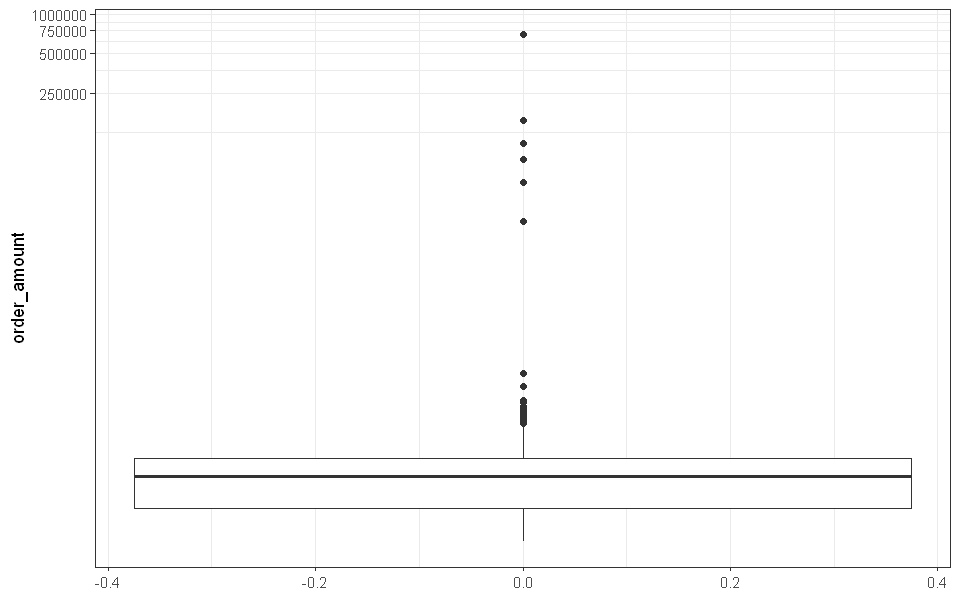

In [11]:
library(tidyverse)
df%>%
ggplot()+
aes(y=order_amount)+
coord_trans(y = "log")+
geom_boxplot()+
theme_bw()

It is easy to see that there's outliers. The AOV is not representative (and misleading...) for our analysis.  
I did a simple data filter to monitor the outliers here.

In [5]:
outlier <- df %>% filter(order_amount>200000)
outlier

order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


By looking at the outliers, the shop_id, user_id, order_amount, total_items, payment_method and even the timestamp is exactly the same - which is almost impossible. I would say there is be an error in the data generation process which needs to be checked.   
However, given no further information(like if this transition exists), removing them is very arbitrary, so I would first keep the outliers for my following calculation for the metrics. And if I know the correct data, I would correct the following values as well.

### b. What metric would you report for this dataset?

The fact that outliers exist means using AOV to evaluate is not proper here.  
Actually, only by looking at "average" order value is not a proper approach to evaluate customers' purchase behavior. When evaluate user purchase behaviours, we should consider all three measures of central tendency - mean, median and mode. 


#### Median order value
Using the median is more robust to deal with the situation with the outlier. 

In [6]:
median_order_value<-median(df$order_amount)
paste("Median order value: $", median_order_value)

[1] "Median order value: $ 284"

#### Modal order value

In [7]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
modal_order_value<-getmode(df$order_amount)
paste("Modal order value: $", modal_order_value)
#how many orders have this order value
paste("There are",nrow(df%>%filter(order_amount==153)),"orders with this value.")

[1] "Modal order value: $ 153"

[1] "There are 87 orders with this value."

#### Data distribution

Warning message:
"Removed 54 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."


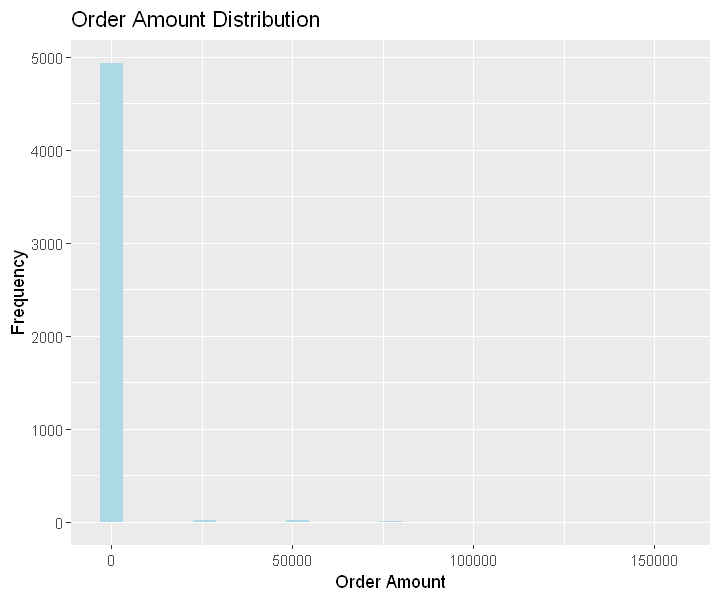

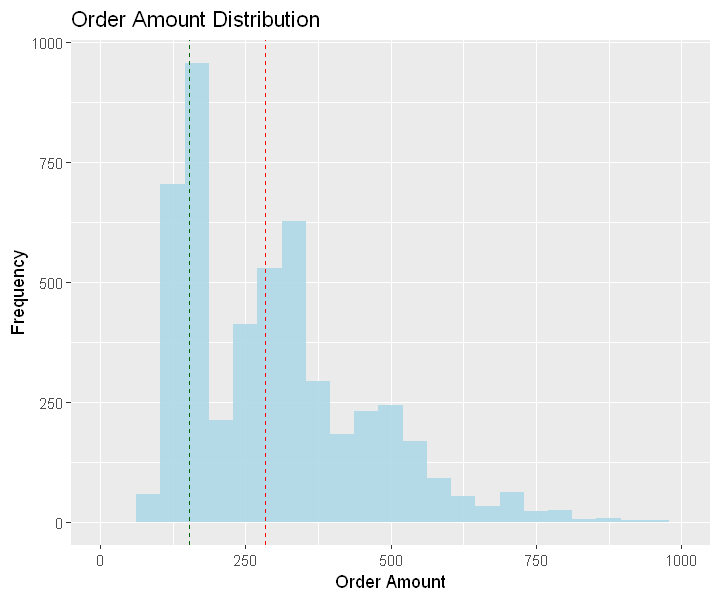

In [27]:
#to make the data distribution shown clearly, outliers are filtered
df %>%
filter(order_amount<700000) %>%
ggplot()+
aes(x=order_amount)+
geom_histogram(bins = 25, fill="lightblue")+
labs(x="Order Amount",y="Frequency",title="Order Amount Distribution")

#take a closer look
df %>%
filter(order_amount<700000) %>%
ggplot()+
aes(x=order_amount)+
geom_histogram(bins=25, fill="lightblue",alpha=0.9)+
xlim(0,1000)+
#the red line represents the median order value
geom_vline(xintercept=median_order_value, linetype="dashed", color="red")+
#the green line represents the modal order value
geom_vline(xintercept=modal_order_value, linetype="dashed", color="darkgreen")+
labs(x="Order Amount",y="Frequency",title="Order Amount Distribution")

options(repr.plot.width=6, repr.plot.height=5)

#### Summary for question b:
- Although is difficult to tell which one is the best, using only the mean one is the worst especially given the existing outliers.   
- If I have to choose one to report, I would say the modal order value. My reason is:   
From the histogram, there are over 800 orders near the modal order value, which is more representative of "quite a number of" data to some extent. Consider the application scenario, the modal shows the most frequent order amount. If we want to boost sales, we can first focus on these orders, try upsell stragedies after understanding them, which is a more efficient approach.

### c: What is its value?

In [9]:
paste("Its value is $", modal_order_value,".")

[1] "Its value is $ 153 ."